# LOCAL UPDATING OF MESHED GEOMODELS AND FLOW SIMULATION


To run a cell, Press Shift+Enter

In [13]:
from lib_distance.Signed_Distance_function import SDF
from lib_cavity.write_local_mesh_file import build_2_local_meshes, merge
from lib_cavity.mesh_2d_file import write_2D_mesh_file_gmsh,write_2D_mesh_req_file
from read_write_vtk import write_vtk_sol
from mmg2d import mmg2d
import matplotlib.cm as cmap
import matplotlib.colors as col
import meshio
import matplotlib.pyplot as plt
import vtk
import numpy as np
import os
path = os.getcwd()
mmg_path = "/home/zakari/Bureau/RING/mmg/build/bin/mmg2d_O3"

# Local Updating
The model which is used in this training is a synthetic model of an oil reservoir. To support wave simulations, this model is triangulated, and the proposed method is based on this initial triangle mesh.
The model which is used in this paper is a synthetic model of an oil reservoir in an anticline. The top (violet) and bottom (green) layers are composed of shale, the reservoir rock (blue) is a sandstone. After the insertion of the fracture, a new zone is represented in yellow.
In this training, settings have been chosen to use a mesh with a lower density in order to reduce the computational costs. Parameters will be explained and range values will be advised.


## Provide input paraters for the local upadting

### Provide the geomodel and the fracture information to compute Signed Distance Function


In [14]:
my_mesh = "input_mesh"
my_mesh_path = path + "/data_paper/"+ my_mesh + ".mesh"
output_sol_file_path = path + "/data_paper/gas_water.sol"
#print(path)


In [15]:
mmg2d([mmg_path,"-nomove", "-noinsert", "-noswap",
           my_mesh_path, path + "/data_paper/"+ my_mesh +".vtk"])
vtk_filepath_to_read= path + "/data_paper/"+ my_mesh +".vtk"
vtk_filepath_to_write= path + "/data_paper/"+ my_mesh +"_sol.vtk"

write_vtk_sol(vtk_filepath_to_read, output_sol_file_path, vtk_filepath_to_write)


  -- MMG2D, Release 5.7.1 (Dec. 20, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 31 2023 12:21:52

  -- INPUT DATA
  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.mesh OPENED

  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.mmg2d OPENED
  -- DATA READING COMPLETED.     0.047s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.1 (Dec. 20, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: develop
     git commit: 65798da2748d326675ab75e6aa2a391c6e9dfb4c
     git date:   2023-03-20 14:44:19 +0100


  -- MMG2DLIB: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : DATA ANALYSIS

  -- MESH QUALITY   22077
     BEST   1.000000  AVRG.   0.965743  WRST.   0.203313 (9849)
     HISTOGRAMM:  100.00 % > 0.12
  -- PHASE 1 COMPLETED.     0.008s

  -- PHASE 2 : ISOTROPIC MESHING

  -- GRADATION : 1.300000 (2.300000)
  -- PHASE 2 COMPLETED.     0.004s

  -- MESH QUALITY   2

  ** /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.sol  NOT FOUND. USE DEFAULT METRIC.

   ## Warning: Overwrite material reference 6 (from LSReferences line 5) with another entry from LSReferences line 5.
               Check your LSReferences table: if possible, each material reference should be unique,
                if not possible, you may encounter unexpected issues (wrong domain mapping or erroneous detection of non-manifold level-set)!


Warning: meshio.Mesh.read is deprecated, use meshio.read instead

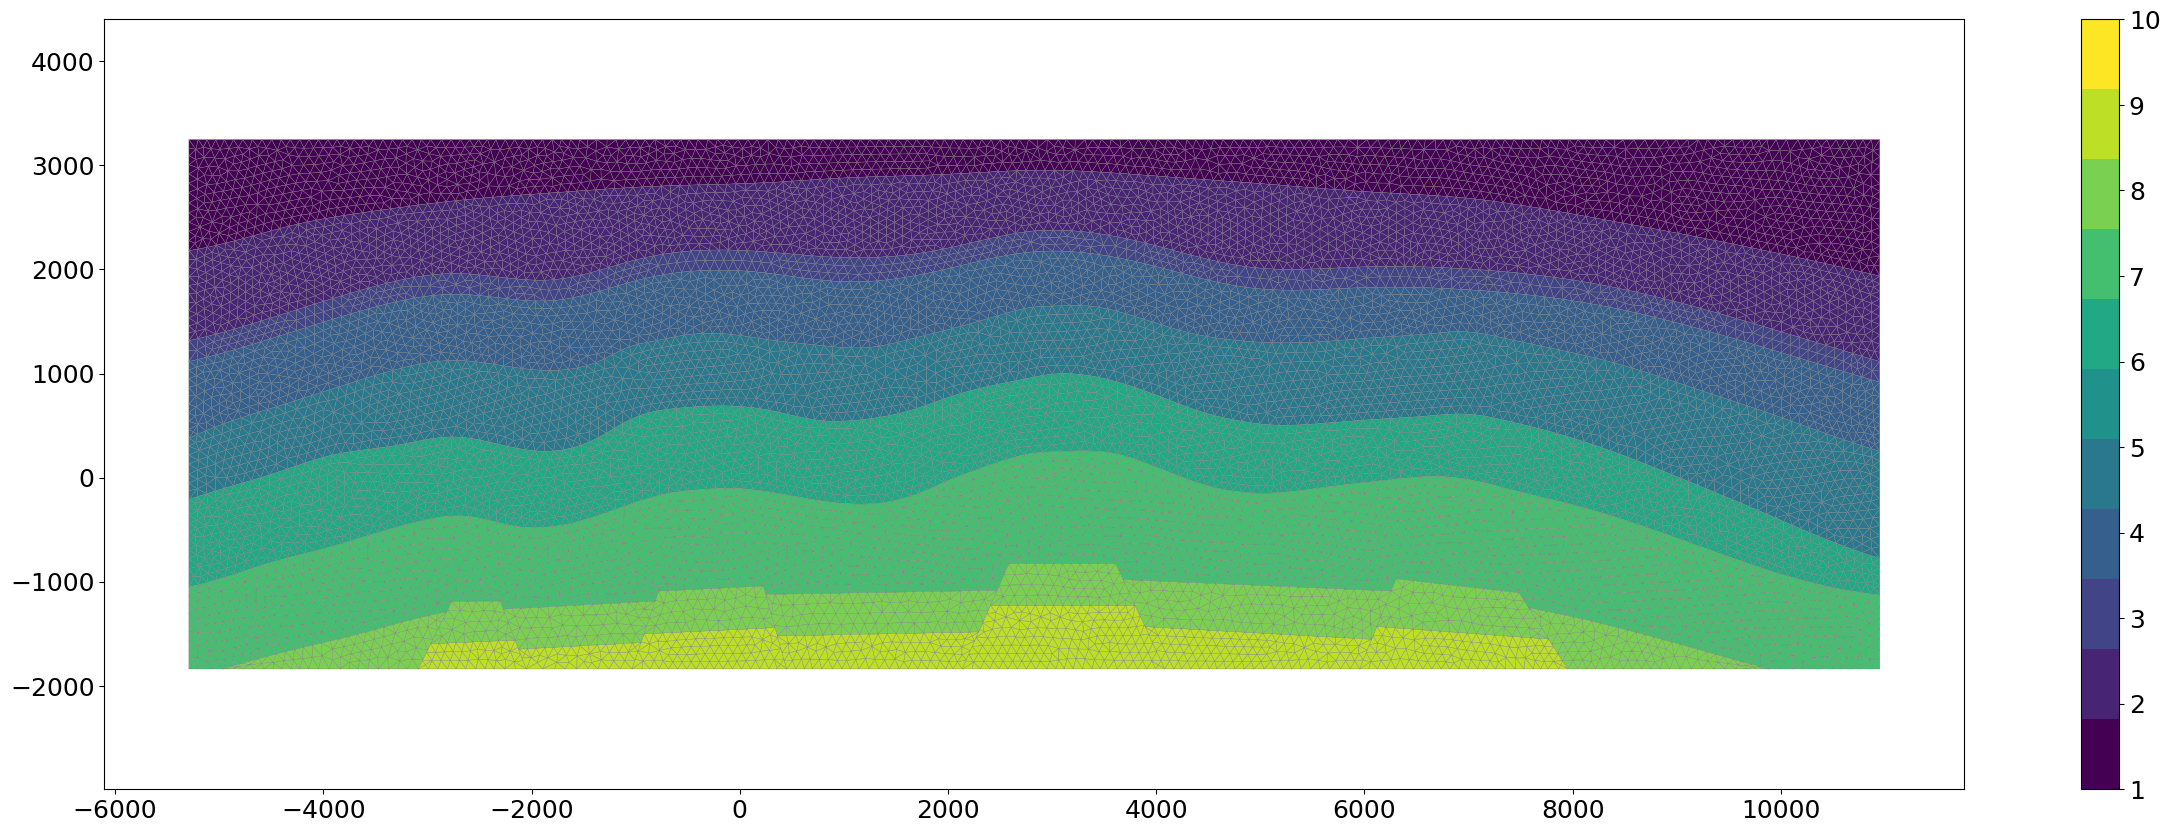

In [16]:
m = meshio.Mesh.read(vtk_filepath_to_write, "vtk")
f=plt.figure(figsize=(30,10))   
a0 = plt.subplot(111)
a0.axis('equal')
# # Read VTK mesh and saturation data
x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.cell_data['medit:ref'][1]
cmap=plt.get_cmap("viridis", 11)
#bounds = np.linspace(1,10,10)
cm=plt.tripcolor(x,y, Triangles,facecolors=region,edgecolor="grey", cmap = cmap)       
     
plt.colorbar(cm)
plt.clim(1,10)



### Visualisation of the fracture implicitly defined at the 0 iso-value of the Signed Distance Function

Warning: meshio.Mesh.read is deprecated, use meshio.read instead

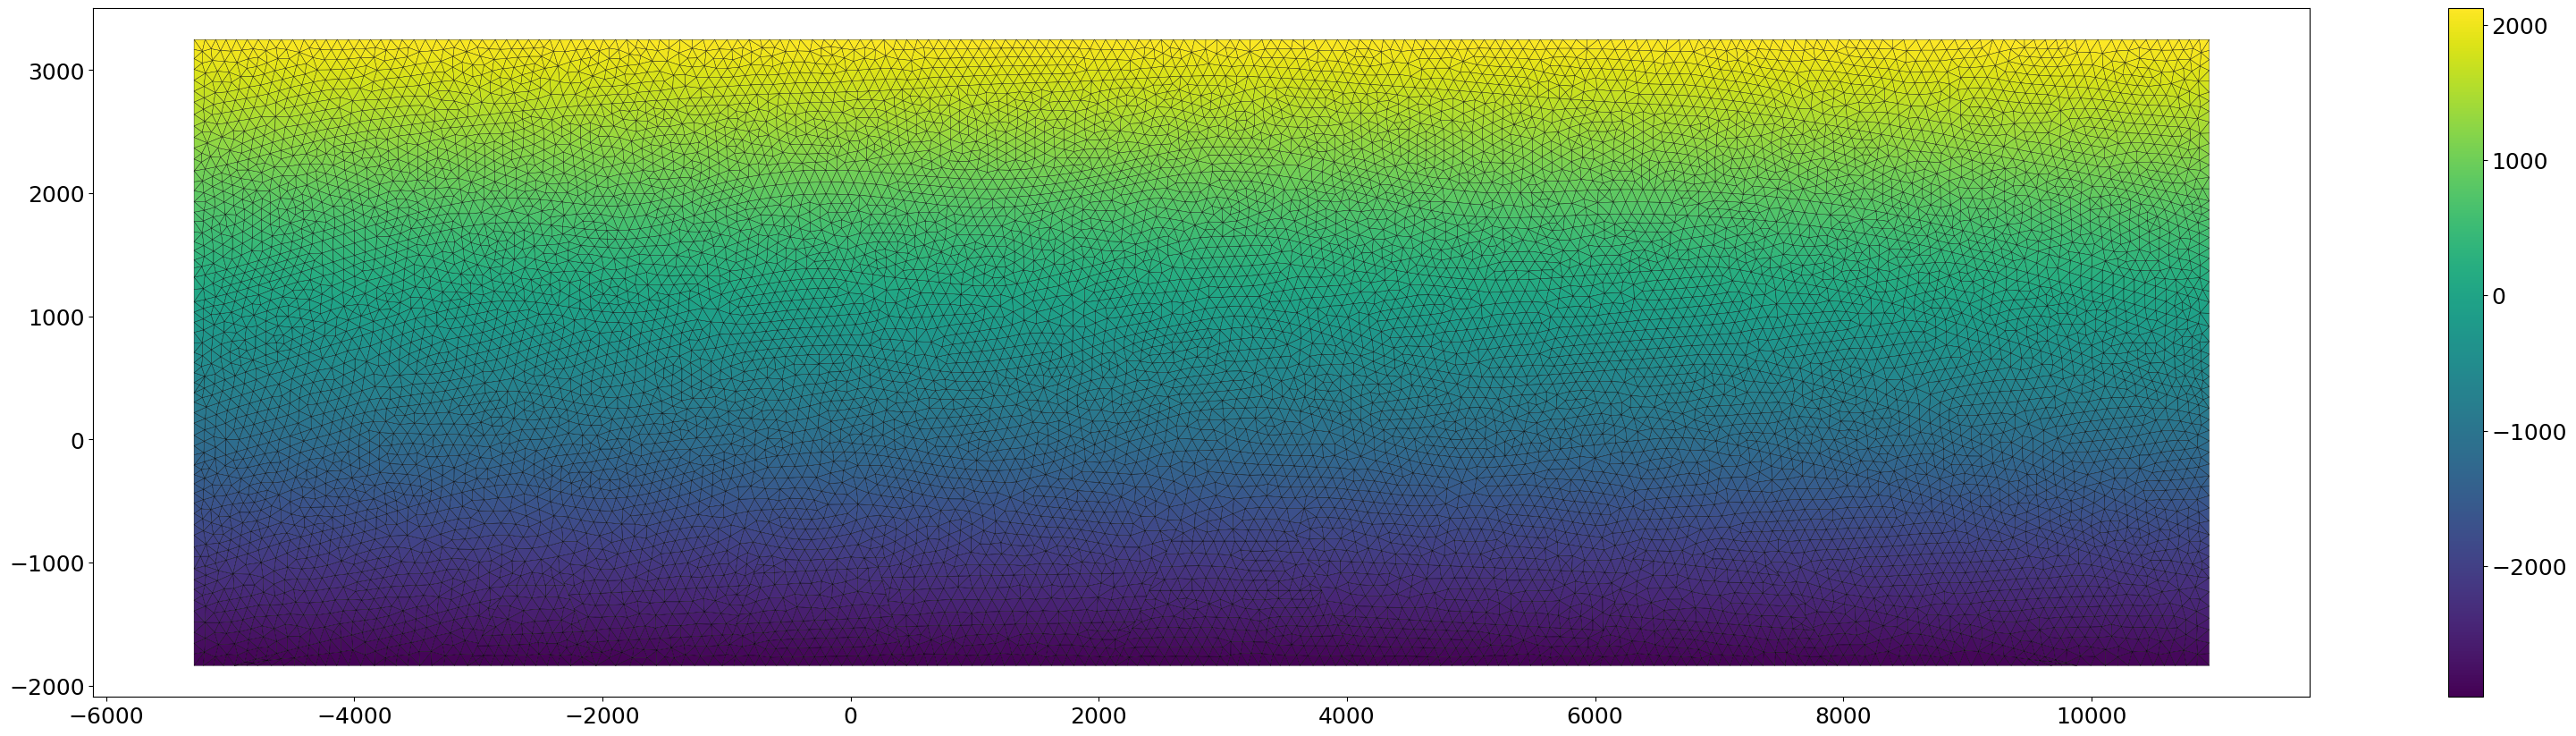

In [17]:
m = meshio.Mesh.read(vtk_filepath_to_write, "vtk")
f=plt.figure(figsize=(40,10))  
    
x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.point_data['Distance']
# plt.tripcolor(x,y, Triangles,facecolors=region)       
cm=plt.tripcolor(x,y, Triangles,region,edgecolor="k")       
plt.colorbar(cm)

## Level-set discretisation with MMG

In [18]:
depth = str(-670)

mmg2d([mmg_path, "-sol", output_sol_file_path, "-ls", depth, "-nomove", "-noinsert", "-noswap",
           my_mesh_path])

output_mesh_file_ls = path + "/data_paper/"+ my_mesh + ".o.mesh"
output_mesh_file_ls_vtk = path + "/data_paper/"+ my_mesh + "_ls.vtk"

mmg2d([mmg_path,"-nomove", "-noinsert", "-noswap",
           output_mesh_file_ls, output_mesh_file_ls_vtk])

  -- MMG2D, Release 5.7.1 (Dec. 20, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 31 2023 12:21:52

  -- INPUT DATA
  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.mesh OPENED
  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/gas_water.sol OPENED

  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.mmg2d OPENED
  -- DATA READING COMPLETED.     0.052s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.1 (Dec. 20, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: develop
     git commit: 65798da2748d326675ab75e6aa2a391c6e9dfb4c
     git date:   2023-03-20 14:44:19 +0100


  -- MMG2DLS: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : ISOSURFACE DISCRETIZATION

  -- MESH QUALITY   22077
     BEST   1.000000  AVRG.   0.965743  WRST.   0.203313 (9849)
     HISTOGRAMM:  100.00 % > 0.12
  *** Manifold implicit surface.
  -- PHASE 1 COMPLETED.     0.011s

  -- PHASE 2 :


   ## Warning: Overwrite material reference 6 (from LSReferences line 5) with another entry from LSReferences line 5.
               Check your LSReferences table: if possible, each material reference should be unique,
                if not possible, you may encounter unexpected issues (wrong domain mapping or erroneous detection of non-manifold level-set)!


Warning: meshio.Mesh.read is deprecated, use meshio.read instead

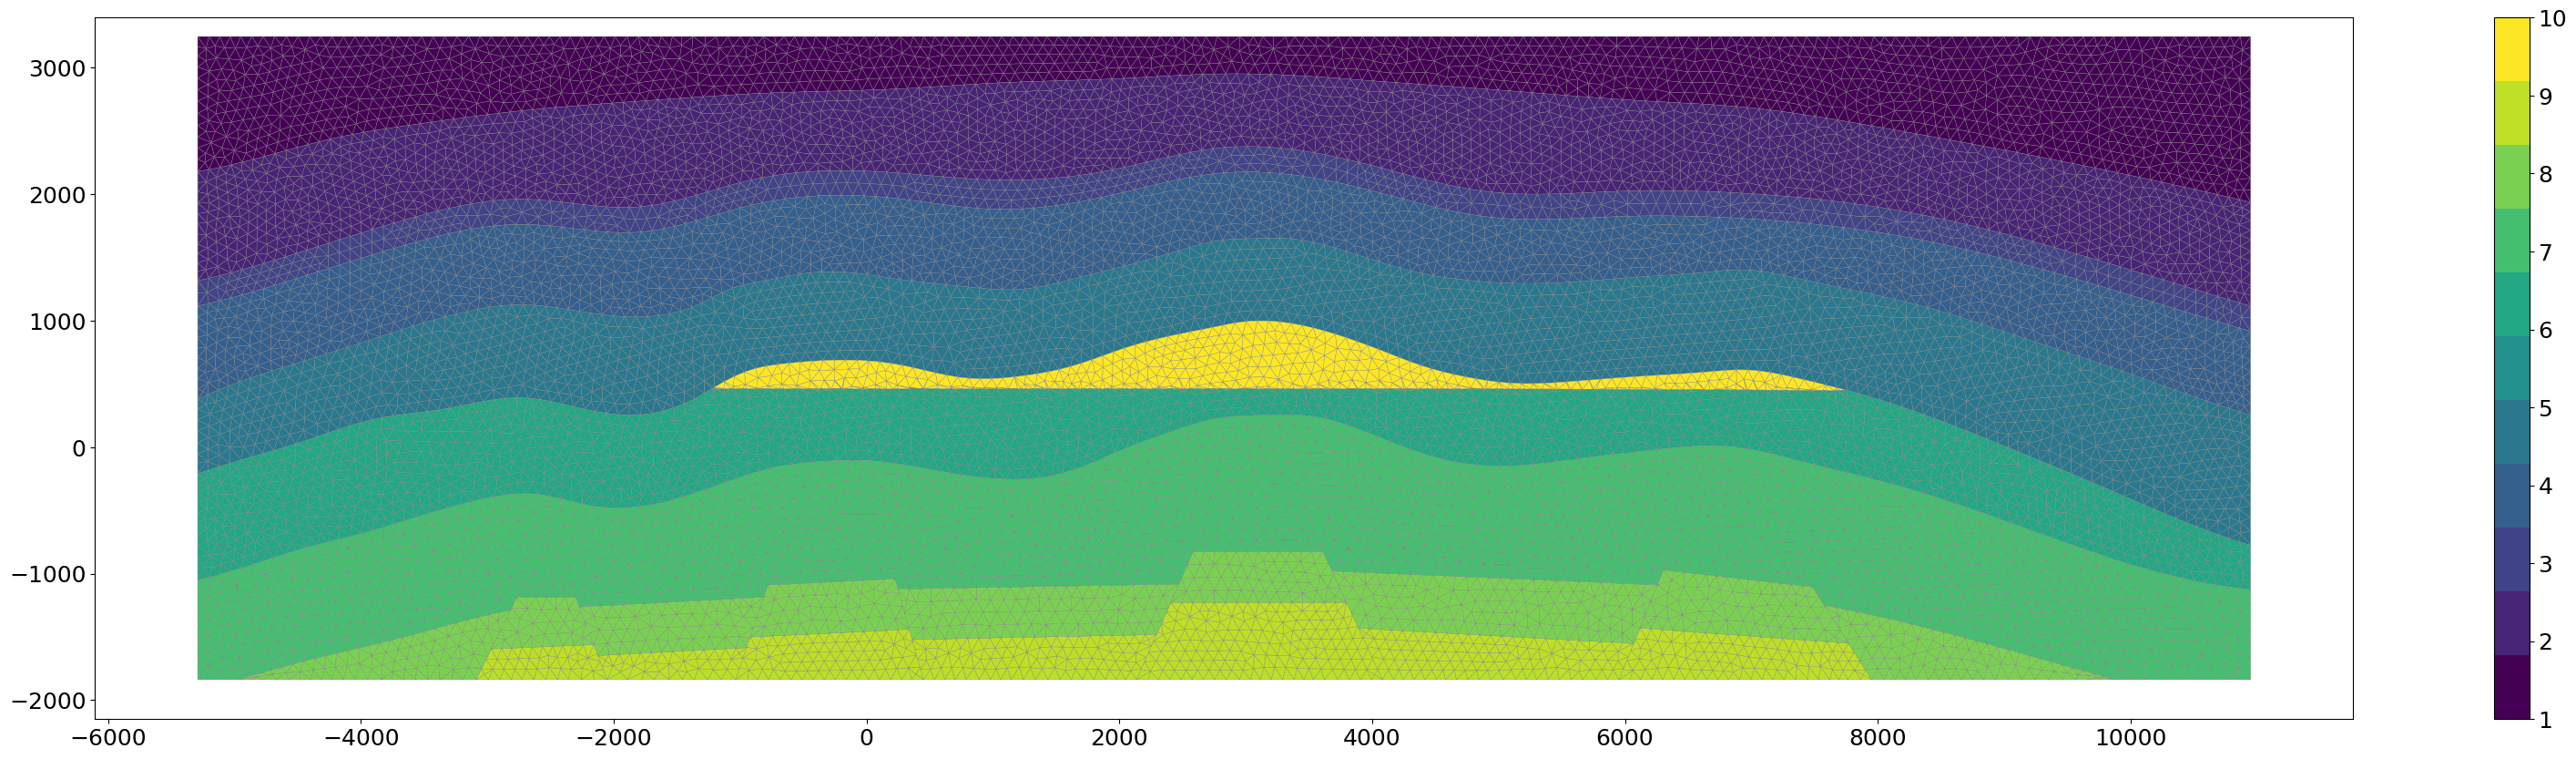

In [19]:
m = meshio.Mesh.read(output_mesh_file_ls_vtk, "vtk")
f=plt.figure(figsize=(40,10)) 
plt.rc('font', size=18)
a0 = plt.subplot(111)
a0.axis('equal')
a0.set_ylim((-2000, 3247))
x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.cell_data['medit:ref'][1]

cm=plt.tripcolor(x,y, Triangles,facecolors=region,edgecolor="grey", cmap=cmap)       
   
plt.colorbar(cm)
plt.clim(1,10)


## Mesh Improvement with MMG

### Definition of the region to modified

In [20]:
#filepath_to_read = output_mesh_file_ls
filepath_to_write_cut = path + "/data_paper/"+ my_mesh + "_reg_cut.mesh"
modified_regions = [6, 10]
kept_regions = [1, 2, 3, 4, 5, 7, 8, 9]
filepath_to_write_other = path + "/data_paper/"+ my_mesh + "_reg_other.mesh"

build_2_local_meshes(output_mesh_file_ls, filepath_to_write_cut, filepath_to_write_other, [modified_regions, kept_regions])

Info    : Reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'...
Info    : 11571 nodes
Info    : 2253 edges
Info    : 22491 triangles
Info    : Done reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'
Info    : Reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'...
Info    : 11571 nodes
Info    : 2253 edges
Info    : 22491 triangles
Info    : Done reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'
Info    : Reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'...
Info    : 11571 nodes
Info    : 2253 edges
Info    : 22491 triangles
Info    : Done reading '/home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh.o.mesh'


  -- MMG2D, Release 5.7.1 (Dec. 20, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 31 2023 12:21:52

  -- INPUT DATA
  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh_reg_cut.mesh OPENED
  -- DATA READING COMPLETED.     0.009s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.1 (Dec. 20, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: develop
     git commit: 65798da2748d326675ab75e6aa2a391c6e9dfb4c
     git date:   2023-03-20 14:44:19 +0100


  -- MMG2DLIB: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : DATA ANALYSIS

  -- MESH QUALITY   3563
     BEST   0.999987  AVRG.   0.907190  WRST.   0.013339 (3249)
     HISTOGRAMM:   98.77 % > 0.12
  -- PHASE 1 COMPLETED.     0.001s

  -- PHASE 2 : ISOTROPIC MESHING

  -- GRADATION : 1.300000 (2.300000)
  -- PHASE 2 COMPLETED.     0.000s

  -- MESH QUALITY   3563
     BEST   0.999987  AVRG.   0.907190  WRST.   0.013339 (3249)

  ** /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh_reg_cut.sol  NOT FOUND. USE DEFAULT METRIC.


Warning: meshio.Mesh.read is deprecated, use meshio.read instead

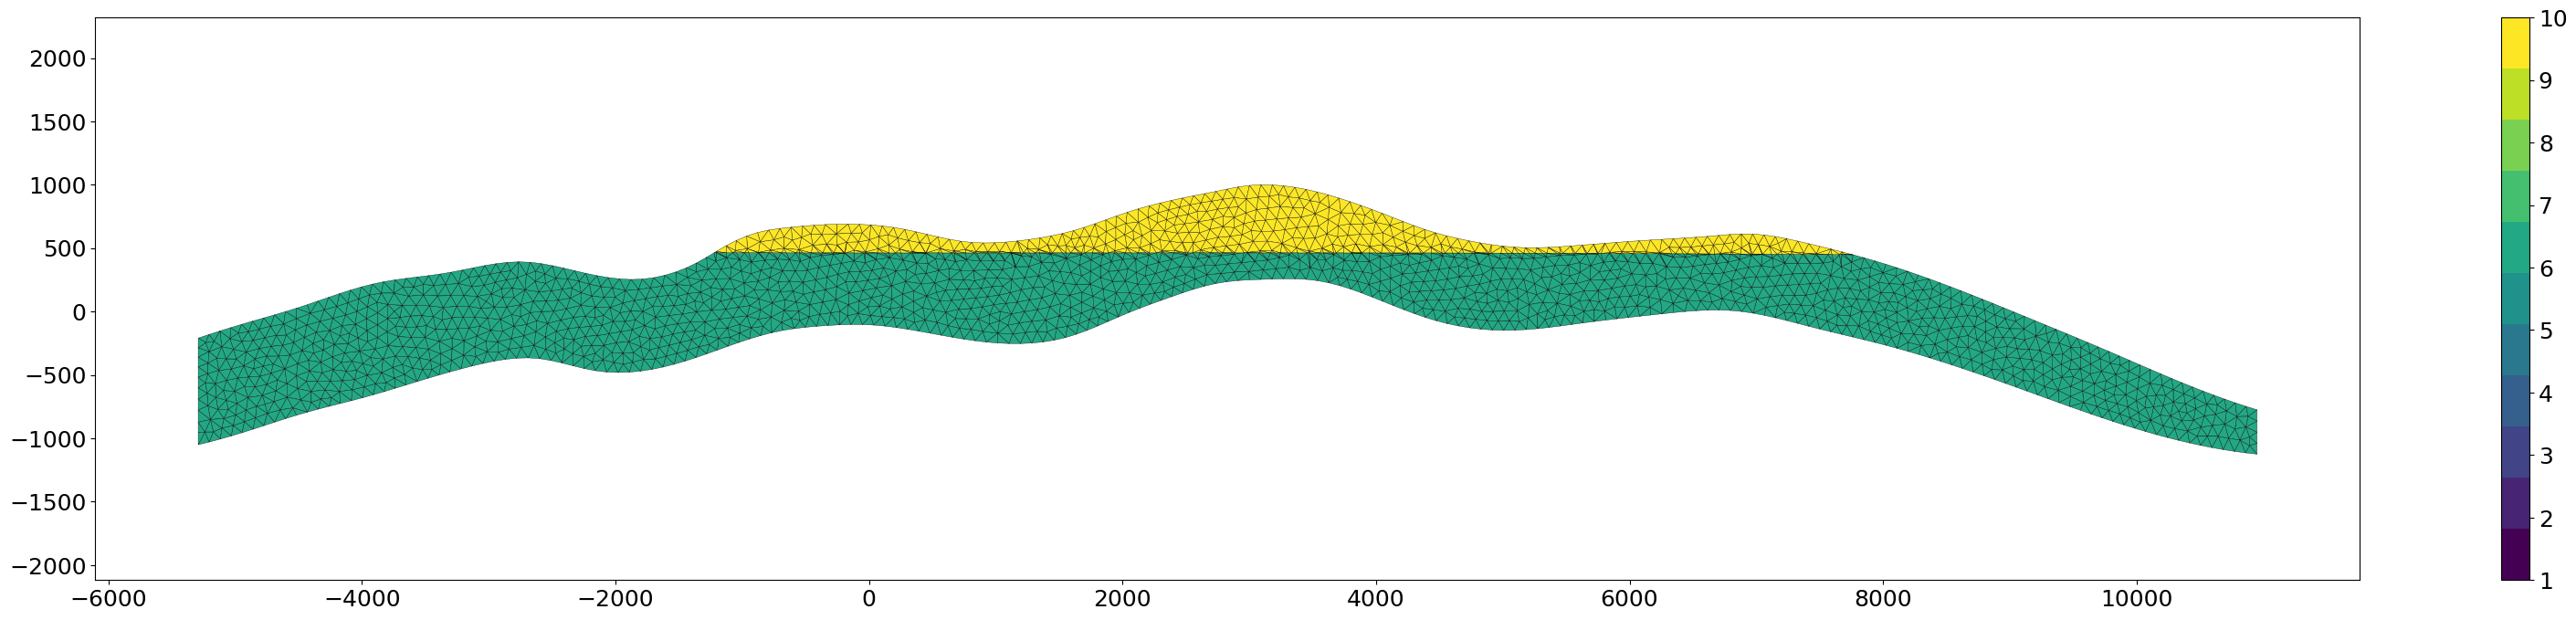

In [21]:
cut_region_path_vtk = path + "/data_paper/"+ my_mesh + "_reg_cut.vtk"

mmg2d([mmg_path, "-nomove", "-noinsert", "-noswap",
           filepath_to_write_cut, cut_region_path_vtk])

m = meshio.Mesh.read(cut_region_path_vtk, "vtk")
f=plt.figure(figsize=(40,8))   
a0 = plt.subplot(111)
a0.axis('equal')
a0.set_ylim((-1000, 1200))

x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.cell_data['medit:ref'][1]
cm=plt.tripcolor(x,y, Triangles,facecolors=region,edgecolor="black", cmap=cmap)       
   
plt.colorbar(cm)
plt.clim(1,10)

### Mark boundary edges to keep the mesh conformity

In [22]:
filepath_to_write_cut_req = path + "/data_paper/"+ my_mesh + "_reg_cut_req.mesh"
write_2D_mesh_req_file(filepath_to_write_cut, filepath_to_write_cut_req)

3 5 100

228 229 100

60 61 100

233 234 100

95 96 100

97 98 100

141 142 100

225 226 100

207 208 100

56 57 100

65 66 100

372 373 100

14 15 100

58 59 100

139 140 100

145 146 100

211 212 100

137 138 100

89 90 100

7 8 100

159 160 100

10 11 100

368 369 100

151 152 100

374 375 100

153 154 100

166 167 100

199 200 100

11 12 100

364 365 100

13 14 100

234 235 100

38 39 100

216 217 100

98 99 100

59 60 100

47 48 100

57 58 100

106 107 100

146 147 100

144 145 100

140 141 100

41 42 100

224 225 100

73 74 100

44 45 100

138 139 100

136 137 100

111 112 100

114 115 100

62 63 100

61 62 100

127 128 100

206 207 100

223 224 100

91 92 100

187 188 100

142 143 100

183 184 100

12 13 100

88 89 100

15 16 100

175 176 100

172 173 100

154 155 100

170 171 100

165 166 100

158 159 100

132 133 100

134 135 100

131 132 100

150 151 100

129 130 100

212 213 100

203 204 100

119 120 100

64 65 100

209 210 100

200 201 100

342 343 100

345 346 100

339 340

### Remeshing in the modified region

  -- MMG2D, Release 5.7.1 (Dec. 20, 2022) 
     Copyright (c) Bdx INP/CNRS/Inria/UPMC, 2004-
     Mar 31 2023 12:21:52

  -- INPUT DATA
  %% /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh_reg_cut_req.mesh OPENED
  -- DATA READING COMPLETED.     0.042s

  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
   MODULE MMG2D: 5.7.1 (Dec. 20, 2022)
  &&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
     git branch: develop
     git commit: 65798da2748d326675ab75e6aa2a391c6e9dfb4c
     git date:   2023-03-20 14:44:19 +0100


  -- MMG2DLIB: INPUT DATA
  --  INPUT DATA COMPLETED.     0.000s

  -- PHASE 1 : DATA ANALYSIS

  -- MESH QUALITY   3563
     BEST   0.999987  AVRG.   0.907190  WRST.   0.013339 (3249)
     HISTOGRAMM:   98.77 % > 0.12
  -- PHASE 1 COMPLETED.     0.002s

  -- PHASE 2 : ISOTROPIC MESHING
         4296 splitted,     1603 collapsed,     1512 swapped, 5 iter.

  -- GRADATION : 1.300000 (2.300000)
            0 splitted,       18 collapsed,       

  ** /home/zakari/Bureau/RING/LUMOS2D/data_paper/input_mesh_reg_cut_req.sol  NOT FOUND. USE DEFAULT METRIC.


Warning: meshio.Mesh.read is deprecated, use meshio.read instead

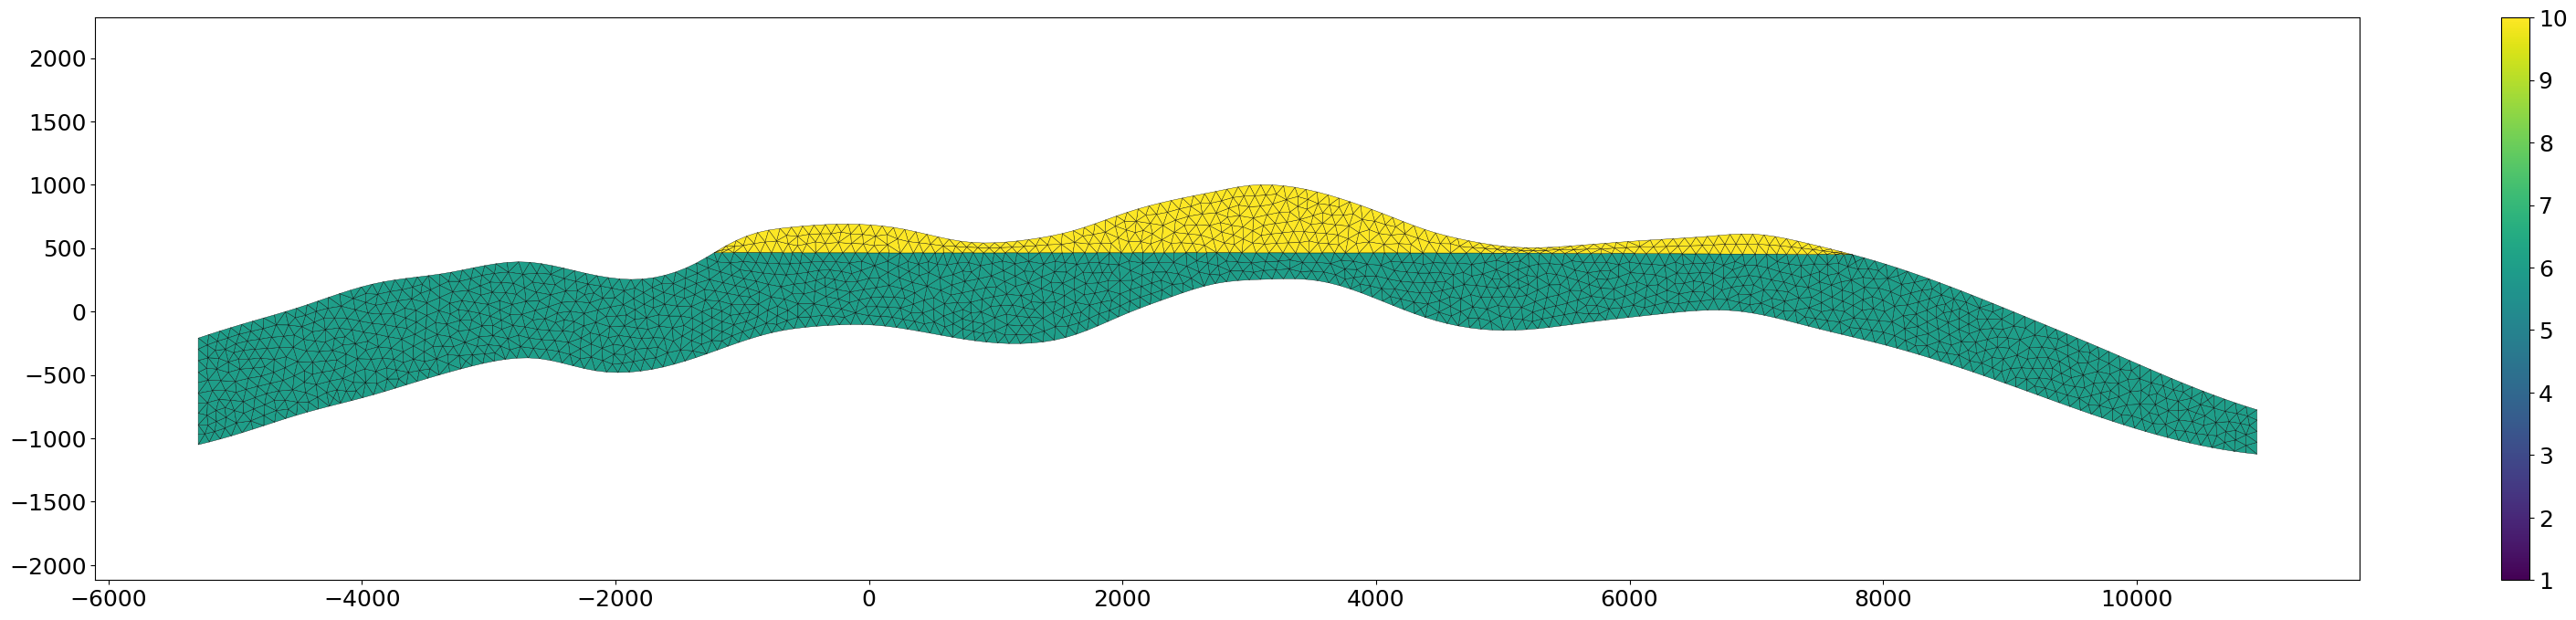

In [26]:
mmg2d([mmg_path, "-hmin", "89.99","-hmax", "90",
           filepath_to_write_cut_req])

output_remeshed=path + "/data_paper/"+ my_mesh + "_reg_cut_req.o.mesh"
output_remeshed_vtk=path + "/data_paper/"+ my_mesh + "_reg_cut_req.o.vtk"

mmg2d([mmg_path, "-nomove", "-noinsert", "-noswap",
           output_remeshed, output_remeshed_vtk])

m = meshio.Mesh.read(output_remeshed_vtk, "vtk")
f=plt.figure(figsize=(40,8))   
a0 = plt.subplot(111)
a0.axis('equal')
a0.set_ylim((-1000, 1200))

x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.cell_data['medit:ref'][1]
cm=plt.tripcolor(x,y, Triangles,facecolors=region,edgecolor="black")       
   
plt.colorbar(cm)
plt.clim(1,10)

## Result of th local modification

In [ ]:
filepath_mesh_merge = path + "/data_paper/" + "mesh_merge.mesh"
filepath_final_mesh = path + "/data_paper/" + "output_mesh.mesh"
filepath_final_mesh_vtk= path + "/data_paper/" + "output_mesh.vtk"

merge(output_remeshed, filepath_to_write_other, filepath_mesh_merge)
print("merge ok")
write_2D_mesh_file_gmsh(filepath_mesh_merge, filepath_final_mesh)

mmg2d([mmg_path, "-nomove", "-noinsert", "-noswap",
           filepath_final_mesh, filepath_final_mesh_vtk])

m = meshio.Mesh.read(filepath_final_mesh_vtk, "vtk")
f=plt.figure(figsize=(30,10))   
a0 = plt.subplot(111)
a0.axis('equal')

x,y,Triangles=m.points[:,0],m.points[:,1],m.cells_dict['triangle']
region=m.cell_data['medit:ref'][1]
cm=plt.tripcolor(x,y, Triangles,facecolors=region,edgecolor="grey")     
plt.colorbar(cm)
plt.clim(1,10)   